In [1]:
import pymc3 as pm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
def build_model(n_a, n_b, true_p_A = 0.05, true_p_B = 0.04):

    #generate some observations
    observations_A = stats.bernoulli.rvs(true_p_A, size=n_a)
    observations_B = stats.bernoulli.rvs(true_p_B, size=n_b)

    with pm.Model() as model:
        p_A = pm.Uniform("p_A", 0, 1)
        p_B = pm.Uniform("p_B", 0, 1)
        delta = pm.Deterministic("delta", p_A - p_B)

        obs_A = pm.Bernoulli("obs_A", p_A, observed=observations_A)
        obs_B = pm.Bernoulli("obs_B", p_B, observed=observations_B)

        step = pm.Metropolis()
        trace = pm.sample(20000, step=step)
        burned_trace=trace[1000:]
    
    return burned_trace

In [3]:
true_p_A = 0.05
true_p_B = 0.04
n_a = 1500
n_b = 750

burned_trace = build_model(n_a=n_a, n_b=n_b, true_p_A=true_p_A, true_p_B=true_p_B)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 9 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [4]:
p_A_samples = burned_trace["p_A"]
p_B_samples = burned_trace["p_B"]
delta_samples = burned_trace["delta"]

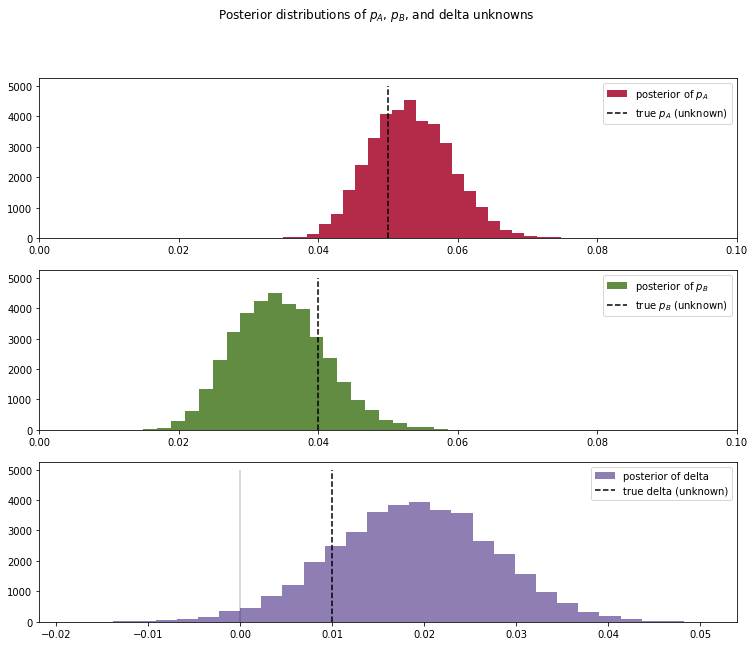

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(12.5, 10))

fig.suptitle("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax[0].set_xlim(0, .1)
ax[0].hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628")
ax[0].vlines(true_p_A, 0, 5000, linestyle="--", label="true $p_A$ (unknown)")
ax[0].legend(loc="upper right")

ax[1].set_xlim(0, .1)
ax[1].hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821")
ax[1].vlines(true_p_B, 0, 5000, linestyle="--", label="true $p_B$ (unknown)")
ax[1].legend(loc="upper right")

ax[2].hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color="#7A68A6")
ax[2].vlines(true_p_A - true_p_B, 0, 5000, linestyle="--",
           label="true delta (unknown)")
ax[2].vlines(0, 0, 5000, color="black", alpha=0.2)
ax[2].legend(loc="upper right")

In [6]:
print("Probability site A is WORSE than site B: %.3f" % \
    np.mean(delta_samples < 0))

print("Probability site A is BETTER than site B: %.3f" % \
    np.mean(delta_samples > 0))

Probability site A is WORSE than site B: 0.019
Probability site A is BETTER than site B: 0.981


In [7]:
for a_n, b_n, in ((1500, 500), (1000, 1000), (500, 1500)):
    burned_trace = build_model(a_n, b_n)
    delta_samples = burned_trace["delta"]
    p = np.mean(delta_samples > 0)
    print(f"N_A: {a_n} and N_B: {b_n}, probability site A is BETTER than site B: {p}")

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 8 seconds.
The number of effective samples is smaller than 25% for some parameters.


N_A: 1500 and N_B: 500, probability site A is BETTER than site B: 0.6257894736842106


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 9 seconds.
The number of effective samples is smaller than 25% for some parameters.


N_A: 1000 and N_B: 1000, probability site A is BETTER than site B: 0.6787894736842105


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 8 seconds.
The number of effective samples is smaller than 25% for some parameters.


N_A: 500 and N_B: 1500, probability site A is BETTER than site B: 0.5000526315789474
